In [1]:
import numpy as np
import itertools

from riders_combination_storage import RidersCombinationsStorage
from queue import Queue

In [2]:
rcs = RidersCombinationsStorage({"a": (2, 3), "b": (2, 15), "c": (0, 7), "d": (13, 16), "e": (14, 16)})

array = rcs.get_combinations(("d",), ("c",))
ind = [1, 3, 45, 5]
new_array = array[ind, :]
rcs.set_combinations(("d",), ("c",), ind, new_array)

array_ = rcs.get_combinations(("d", "c"), ("c",))
ind_ = [1, 45]
new_array_ = array_[ind_, :]
rcs.set_combinations(("d", "c"), ("c",), ind_, new_array_)

In [3]:
rcs.get_combinations(("d", "c"), ("c", )).shape

(84, 17)

In [4]:
rcs.get_combinations(("d",), ("c", )).shape

(63, 17)

In [5]:
rcs = RidersCombinationsStorage({"a": (2, 3), "b": (2, 15), "c": (0, 7), "d": (13, 16), "e": (14, 16)})

array = rcs.get_combinations(("d",), ("c",))
ind = [1, 3, 45, 5]
new_array = array[ind, :]
rcs.set_combinations(("d",), ("c",), ind, new_array)

array_ = rcs.get_combinations(("d", "c"), ("c",))
ind_ = [1, 45]
new_array_ = array_[ind_, :]
rcs.set_combinations(("d", "c"), ("c",), ind_, new_array_)

In [6]:
"""
rcs.best_combination = ("c", ), np.array([0, 1, 4]), np.array([100, 10, 20])
print(rcs.best_combination)
rcs.best_combination = ("d", "c", ), np.array([12, 3, 4]), np.array([10, 10, 10])
print(rcs.best_combination)
rcs.best_combination = ("c", "q", ), np.array([31, 0, 12]), np.array([20, 20, 20])
print(rcs.best_combination)
rcs.best_combination = ("c", ), np.array([0, 1, 4]), np.array([100, 10, 20])
print(rcs.best_combination)
rcs.best_combination = ("d", "c", "c"), np.array([1, 2]), np.array([1, 5])
print(rcs.best_combination)
"""

'\nrcs.best_combination = ("c", ), np.array([0, 1, 4]), np.array([100, 10, 20])\nprint(rcs.best_combination)\nrcs.best_combination = ("d", "c", ), np.array([12, 3, 4]), np.array([10, 10, 10])\nprint(rcs.best_combination)\nrcs.best_combination = ("c", "q", ), np.array([31, 0, 12]), np.array([20, 20, 20])\nprint(rcs.best_combination)\nrcs.best_combination = ("c", ), np.array([0, 1, 4]), np.array([100, 10, 20])\nprint(rcs.best_combination)\nrcs.best_combination = ("d", "c", "c"), np.array([1, 2]), np.array([1, 5])\nprint(rcs.best_combination)\n'

In [7]:
rider_requirements = np.array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [8]:
from combinations_checker import CombinationsChecker

In [9]:
comb_check = CombinationsChecker(rider_requirements)

In [10]:
comb_check(array_)

(array([0, 1, 6]),
 array([[2., 2., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
         0.],
        [2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
         0.],
        [1., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
         0.]]),
 array([1., 0., 1.]))

In [11]:
# дописать и провериь все у очереди 

In [12]:
from riders_iterator import RidersIterator

In [13]:
ri = RidersIterator(rcs, comb_check)

In [14]:
ri._RidersIterator__ids

{'b', 'c', 'd', 'e'}

In [15]:
# ri._RidersIterator__combination_deque.get()

In [16]:
ri._RidersIterator__checked_combinations

set()

In [17]:
ri._RidersIterator__add_in_checked_combinations((("b", "c"), ("d", "e")))
ri._RidersIterator__add_in_checked_combinations((("b", "c"), ("d",)))
ri._RidersIterator__add_in_checked_combinations((("b", "c"), ()))
ri._RidersIterator__add_in_checked_combinations((("b",), ()))

In [18]:
ri._RidersIterator__checked_combinations

{frozenset({'b', 'e'}),
 frozenset({'b', 'c'}),
 frozenset({'b', 'd'}),
 frozenset({'b', 'c', 'd'}),
 frozenset({'b', 'd', 'e'}),
 frozenset({'b', 'c', 'e'}),
 frozenset({'b', 'c', 'd', 'e'})}

In [19]:
ri.put_combinations((("c", "d"), ()))

In [20]:
ri._RidersIterator__combinations_queue.get()

(('d',), ())

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [9]:
ls -la

total 168
drwxr-xr-x@ 17 grigorijpenkin  staff    544 Feb  4 15:43 ./
drwxr-xr-x  31 grigorijpenkin  staff    992 Feb  3 11:07 ../
-rw-r--r--@  1 grigorijpenkin  staff   6148 Feb  3 11:08 .DS_Store
drwxr-xr-x  12 grigorijpenkin  staff    384 Feb  4 14:02 .git/
drwxr-xr-x   9 grigorijpenkin  staff    288 Feb  4 15:42 .idea/
drwxr-xr-x   3 grigorijpenkin  staff     96 Jan 31 19:51 .ipynb_checkpoints/
-rw-r--r--   1 grigorijpenkin  staff  16038 Feb  4 15:43 EDA.ipynb
drwxr-xr-x   4 grigorijpenkin  staff    128 Feb  4 14:03 __pycache__/
-rw-r--r--   1 grigorijpenkin  staff    525 Feb  4 15:43 combinations_checker.py
-rw-r--r--   1 grigorijpenkin  staff   2174 Feb  2 23:05 get_schedule.py
-rw-r--r--   1 grigorijpenkin  staff   1491 Jan 31 20:43 requirements.txt
-rwxr-xr-x@  1 grigorijpenkin  staff  13177 Jan 30 20:13 riders.csv*
-rw-r--r--   1 grigorijpenkin  staff   3602 Feb  4 15:41 riders_checker.py
-rw-r--r--   1 grigorijpenkin  staff   5999 Feb  4 13:59 riders_combination_storage.py
dr

In [10]:
riders = pd.read_csv("./riders.csv", index_col="rider_id")
zones = pd.read_csv("./zones.csv", index_col="zone_id")

In [11]:
np.unique(riders["end_hour"] - riders["start_hour"])

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [12]:
riders["zone_id"].value_counts()

44    22
92    16
8     15
60    15
81    15
      ..
4      5
41     5
7      4
96     4
93     3
Name: zone_id, Length: 98, dtype: int64

In [13]:
# TODO: тесты, аннотации, mpi

In [14]:
min(riders["start_hour"]), max(riders["end_hour"])

(6, 22)

In [15]:
# Курьер -> (Зона, Время)

# 1. Можно ли увеличивать время работы курьера ?
# 2. Для каждого курьера определена своя зона. Поэтому можно в принципе рассматривать каждую зону изолированно.

In [16]:
# Эффективное расписание – это расписание с минимальным количеством часов в зонах доставки без курьеров.

In [17]:
# Мультипроцессинг

In [18]:
zones

,zone_hour_6,zone_hour_7,zone_hour_8,zone_hour_9,zone_hour_10,zone_hour_11,zone_hour_12,zone_hour_13,zone_hour_14,zone_hour_15,zone_hour_16,zone_hour_17,zone_hour_18,zone_hour_19,zone_hour_20,zone_hour_21,zone_hour_22
zone_id,,,,,,,,,,,,,,,,,
1,6,1,2,7,1,5,5,6,6,9,6,9,4,1,8,3,9
2,6,1,8,8,4,9,5,9,4,3,1,9,9,2,9,1,5
3,5,2,2,6,3,3,7,4,5,4,6,9,3,4,4,6,9
4,4,8,7,1,1,6,1,2,2,8,5,8,4,8,6,1,9
5,9,2,9,4,1,6,8,4,8,7,6,3,2,9,9,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,6,7,3,4,1,1,8,1,5,2,1,6,3,1,6,9
96,2,2,4,8,1,4,6,4,7,5,6,2,7,8,2,3,5
97,9,7,3,3,7,5,6,7,8,7,7,6,2,4,7,6,1


In [19]:
# 1. В каком порядке сортировать на выбрасывание и вообще нужно ли оно????

In [20]:
cum_hour = np.zeros(22 - 5)

In [21]:
rider = riders.loc[riders.zone_id == 1]

In [22]:
for i in rider.index:
    rid = rider.loc[i, :]
    for hour in range(rid["start_hour"], rid["end_hour"] + 1):
        cum_hour[hour - 6] += 1

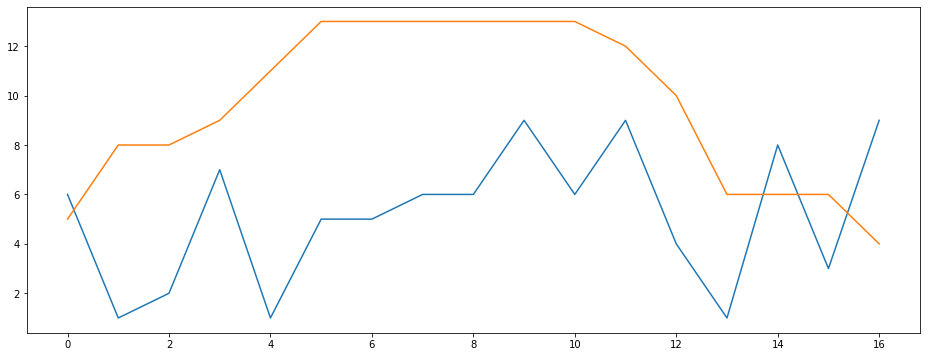

In [23]:
plt.figure(figsize=(16, 6))
plt.plot(zones.iloc[0, :].values)
plt.plot(cum_hour)
plt.show()

In [24]:
zones.iloc[0, :].values

array([6, 1, 2, 7, 1, 5, 5, 6, 6, 9, 6, 9, 4, 1, 8, 3, 9])

In [25]:
cum_hour

array([ 5.,  8.,  8.,  9., 11., 13., 13., 13., 13., 13., 13., 12., 10.,
        6.,  6.,  6.,  4.])

In [ ]:
# 1. Если надо кого то вырубить из-за повышенного спроса, то вырубать 
# нужно человека у которого сейчас наименьшая по длительности будующая работоспособность

In [ ]:
import itertools

In [ ]:
list(itertools.product([0, 1], repeat=3))

In [ ]:
# list(itertools.product(np.arange(10), repeat = 2))

In [26]:
# assert len(tuple()) | len(())

In [ ]:
# constraints_intervals = list(a._get_time_variants(0, 3))
# list(a._get_time_variants(0, 3))

In [ ]:
# working_hours = np.zeros(5)

In [ ]:
# working_hours[slice(*constraints_intervals[0])] +=1

In [ ]:
# 1. Операция добавления курьера
# 2. Операция удаления курьера
# 3. Операция сокращения расписания
# 4. Операция увеличения расписания

# * Выход по early stopping ???

In [ ]:
# Сколько преребирать ???

In [ ]:
%%time
for i in range(2**22):
    i**5

In [ ]:
np.ones(2**22)

In [ ]:
zones.iloc[0, :].values

In [ ]:
# (6 22)

In [ ]:
import itertools

In [ ]:
it = itertools.combinations(np.arange(9, 22 + 1), 2)
# it_0 = itertools.filterfalse(lambda x: (x[1] - x[0]) > 5, it)
it_0 = filterfalse(lambda x: x[1] - x[0] < 4, it)
list(it_0).__len__()

In [ ]:
d = {1: 2, 3: 4}

In [ ]:
riders.loc[riders.zone_id == 44].sort_values(by=["start_hour"])